# Sci-Cal Differential Example 
### Below is an example of how to plot sci-cal differentials using SpecCorrect. This notebook also includes some anaylsis done to figure out why there was a jump 
### in radial velocities around 11/25/22

In [44]:
import lib
import numpy as np
import h5py as hpy
import matplotlib.pyplot as plt
import scipy
from astropy.timeseries import LombScargle
from datetime import datetime

# Loading in data from HDF5 files

In [21]:
cenM_artimesci = np.array(hpy.File('/data1/linefits/outputsLFCHPF/wavl_master_sciUPDATEConsolodate/All_time.hdf5', 'r')['dat'][:])
cenM_artimecal = np.array(hpy.File('/data1/linefits/outputsLFCHPF/consolidatedData_master/All_time.hdf5', 'r')['dat'][:])
cenM_wavlsci = np.array(hpy.File('/data1/linefits/outputsLFCHPF/wavl_master_sciUPDATEConsolodate/All_centroidWl.hdf5', 'r')['dat'][:]) 
cenM_wavlcal = np.array(hpy.File('/data1/linefits/outputsLFCHPF/consolidatedData_master/All_centroidWl.hdf5', 'r')['dat'][:])
cenM_FWHMcal = np.array(hpy.File('/data1/linefits/outputsLFCHPF/consolidatedData_master/All_fwhmWls.hdf5', 'r')['dat'][:])
cenM_SNRcal = np.array(hpy.File('/data1/linefits/outputsLFCHPF/consolidatedData_master/All_snrPeak.hdf5', 'r')['dat'][:])

In [68]:
cenM_FWHMsci = np.array(hpy.File('/data1/linefits/outputsLFCHPF/wavl_master_sciUPDATEConsolodate/All_fwhmWls.hdf5', 'r')['dat'][:]) 
cenM_SNRcal = np.array(hpy.File('/data1/linefits/outputsLFCHPF/wavl_master_sciUPDATEConsolodate/All_snrPeak.hdf5', 'r')['dat'][:])

In [3]:
out_indices = lib.CompatibleDataArraysIND(cenM_artimesci , cenM_artimecal)

In [35]:
compat_wavl = lib.CompatibleWavelengths(cenM_wavlcal , out_indices)

In [36]:
cenM_orders = np.array(hpy.File('/data1/linefits/outputsLFCHPF/wavl_master_sciUPDATEConsolodate/All_order.hdf5', 'r')['dat'][:])
cenM_indices = np.array(hpy.File('/data1/linefits/outputsLFCHPF/wavl_master_sciUPDATEConsolodate/All_index.hdf5', 'r')['dat'][:])

In [37]:
abs_ind = lib.order_index_selector(cenM_orders, cenM_indices, 7, 11, 1000)

In [38]:
velocity_ind_cal = lib.abs_ind_vels(compat_wavl,abs_ind, 0)
velocity_ind_sci = lib.abs_ind_vels(cenM_wavlsci,abs_ind, 0)

In [39]:
sci_time = lib.convert_time(cenM_artimesci)
cal_time = lib.convert_time(cenM_artimecal)

# Plotting FWHM and SNR Data to check data jump in Velocities

In [113]:
medians = [] 

for i in range(len(cenM_FWHMcal)):
    med = np.nanmedian(cenM_FWHMcal[i])
    medians.append(med)


medians1 = [] 

for i in range(len(cenM_SNRcal)):
    med1 = np.nanmedian(cenM_SNRcal[i])
    medians1.append(med1)

In [114]:
medians_sci = [] 

for i in range(len(cenM_FWHMsci)):
    med = np.nanmedian(cenM_FWHMsci[i])
    medians_sci.append(med)


medians_sci1 = []

for i in range(len(cenM_SNRsci)):
    med1 = np.nanmedian(cenM_SNRsci[i])
    medians_sci1.append(med1)

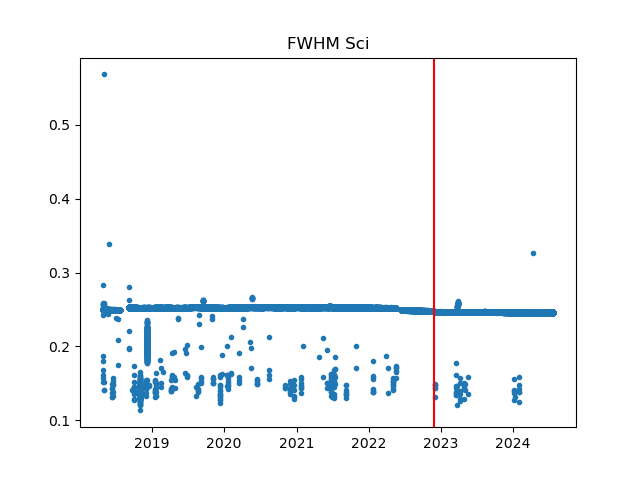

In [115]:
%matplotlib widget 
plt.figure()
plt.title('FWHM Sci')
plt.plot(sci_time, medians_sci, '.')
plt.axvline(datetime(2022, 11, 25), color = 'red')

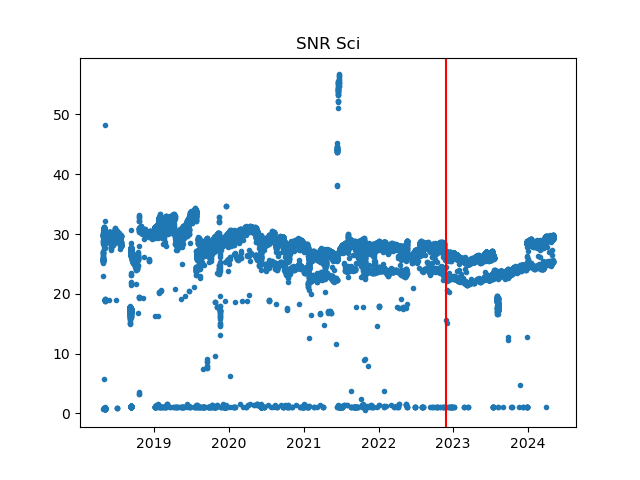

In [116]:
%matplotlib widget 
plt.figure()
plt.title('SNR Sci')
plt.plot(cal_time, medians_sci1, '.')
plt.axvline(datetime(2022, 11, 25), color = 'red')

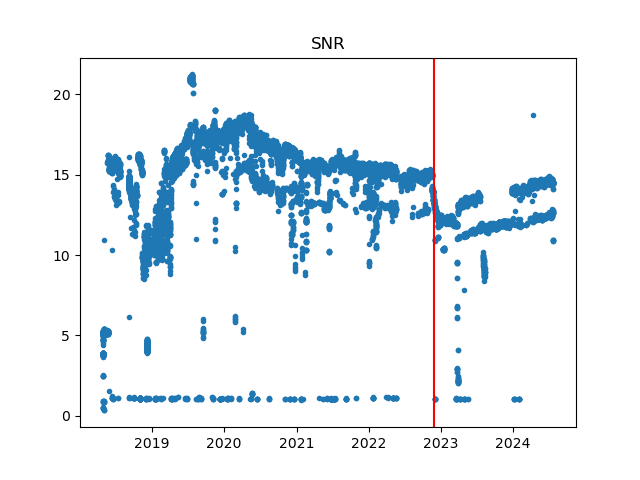

In [120]:
%matplotlib widget 
plt.figure()
plt.title('SNR')
plt.plot(sci_time ,medians1, '.')
plt.axvline(datetime(2022, 11, 25), color = 'red')

Text(0, 0.5, 'FWHM')

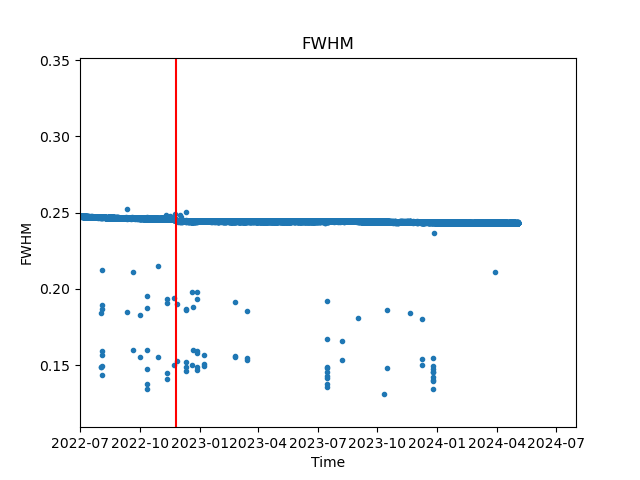

In [121]:
%matplotlib widget 
plt.figure()
plt.title('FWHM')
plt.plot(cal_time, medians, '.')
plt.xlim(datetime(2022,7,1), datetime(2024,8,1))
plt.axvline(datetime(2022, 11, 25), color = 'red')
plt.xlabel('Time')
plt.ylabel('FWHM')

# Velocity Plots

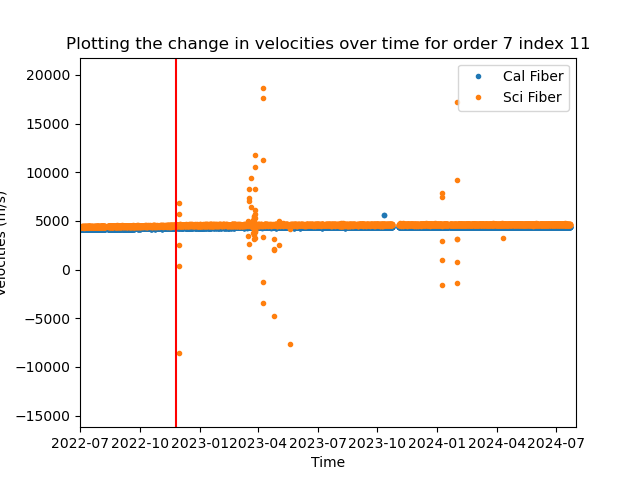

In [60]:
%matplotlib widget 
plt.figure()
plt.title("Plotting the change in velocities over time for order 7 index 11")
plt.ylabel('Velocities (m/s)')
plt.xlabel('Time')
plt.plot(sci_time ,velocity_ind_cal, '.', label = 'Cal Fiber')
plt.plot(sci_time,velocity_ind_sci,'.', label = 'Sci Fiber')
plt.xlim(datetime(2022,7,1), datetime(2024,8,1))
plt.axvline(datetime(2022, 11, 25), color = 'red')
plt.legend()

In [47]:
median_cal = lib.boxcar_median(velocity_ind_cal, 200)
median_sci = lib.boxcar_median(velocity_ind_sci, 200)

/tmp/ipykernel_114369/1489919526.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


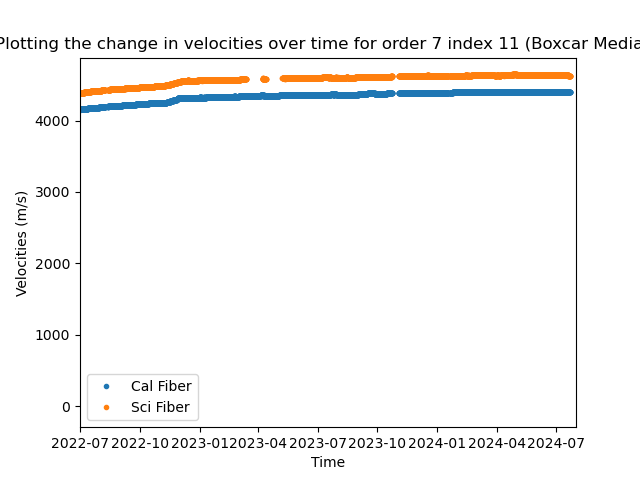

In [54]:
%matplotlib widget 
plt.figure()
plt.title("Plotting the change in velocities over time for order 7 index 11 (Boxcar Median)")
plt.ylabel('Velocities (m/s)')
plt.xlabel('Time')
plt.plot(sci_time, median_cal, '.', label = 'Cal Fiber')
plt.plot(sci_time, median_sci, '.', label = 'Sci Fiber')
plt.xlim(datetime(2022,7,1),datetime(2024, 8,1))
plt.legend()

In [81]:
compat_vels = lib.wl2vel(compat_wavl, 0)
median_vels = [] 
for i in range(len(compat_vels)):
    med = np.nanmedian(compat_vels[i])
    median_vels.append(med)

In [91]:
science_vels = lib.wl2vel(cenM_wavlsci, 0)
median_vels_sci = [] 
for i in range(len(cenM_wavlsci)):
    med_sci = np.nanmedian(cenM_wavlsci[i])
    median_vels_sci.append(med_sci)    

In [98]:
scical_differential = [] 
for i in range(len(median_vels_sci)):
    diff = np.subtract(median_vels_sci[i], median_vels[i])
    scical_differential.append(diff)

In [99]:
calsci_differential = []
for i in range(len(median_vels_sci)):
    diff = np.subtract(median_vels[i], median_vels_sci[i])
    calsci_differential.append(diff)

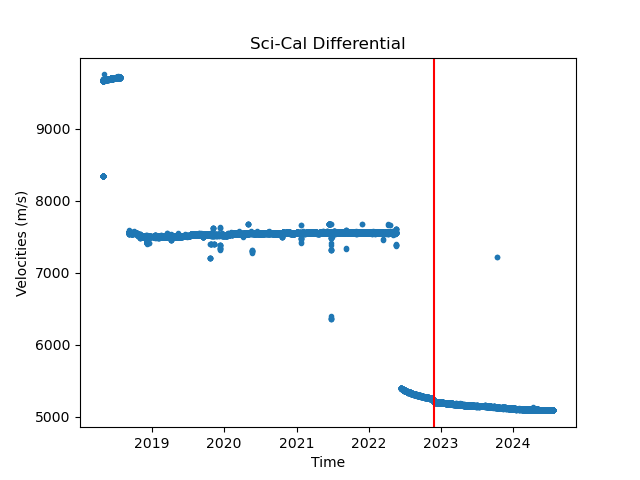

In [129]:
%matplotlib widget 
plt.figure()
plt.plot(sci_time ,scical_differential, '.')
plt.title('Sci-Cal Differential')
plt.xlabel('Time')
plt.ylabel('Velocities (m/s)')
plt.axvline(datetime(2022, 11, 25), color = 'red')

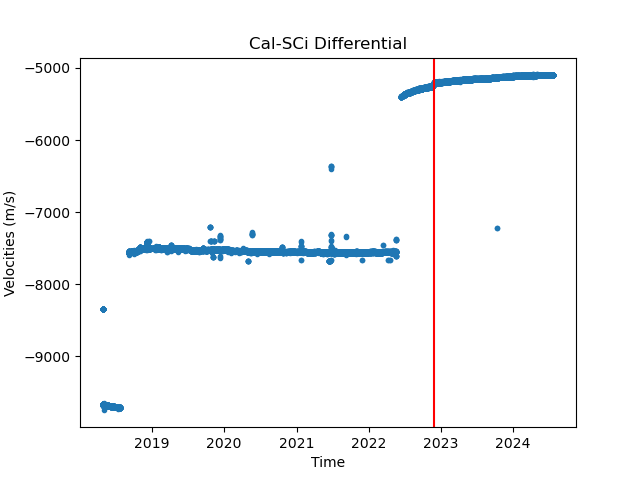

In [130]:
%matplotlib widget 
plt.figure()
plt.plot(sci_time ,calsci_differential, '.')
plt.title('Cal-SCi Differential')
plt.xlabel('Time')
plt.ylabel('Velocities (m/s)')
plt.axvline(datetime(2022, 11, 25), color = 'red')

In [107]:
cal_vels1 = lib.wl2vel(compat_wavl, 0)
sci_vels1 = lib.wl2vel(cenM_wavlsci, 0)
sci_cal = [] 

for i in range(len(cal_vels1)):
    diff = np.subtract(sci_vels1[i], cal_vels1[i])
    med = np.nanmedian(diff)
    sci_cal.append(med)

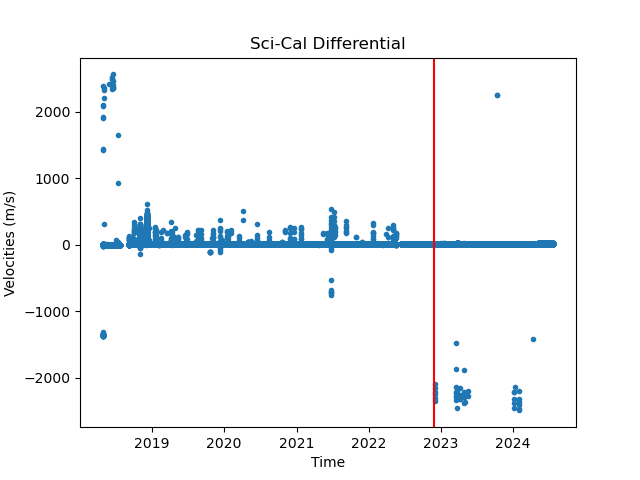

In [110]:
%matplotlib widget 
plt.figure()
plt.plot(sci_time, sci_cal, '.')
plt.title('Sci-Cal Differential')
plt.xlabel('Time')
plt.ylabel('Velocities (m/s)')
plt.axvline(datetime(2022, 11, 25), color = 'red')

In [ ]:
cal_sci = []
for i in range(len(cal_vels1)):
    diff1 = np.subtract(cal_vels1[i], sci_vels1[i])
    med1 = np.nanmedian(diff1)
    cal_sci.append(med1)

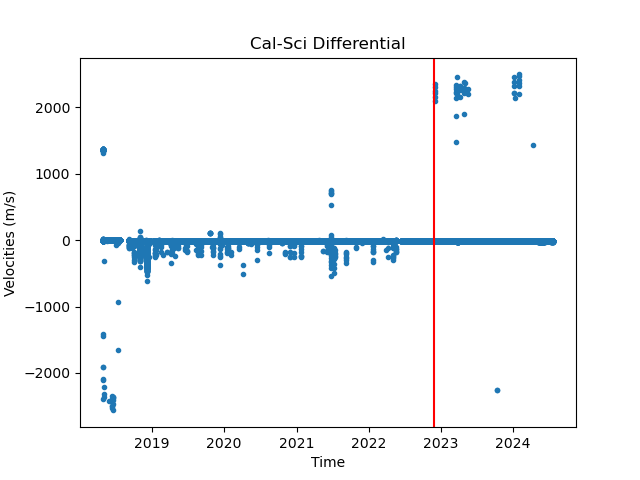

In [128]:
%matplotlib widget 
plt.figure()
plt.plot(sci_time, cal_sci, '.')
plt.title('Cal-Sci Differential')
plt.xlabel('Time')
plt.ylabel('Velocities (m/s)')
plt.axvline(datetime(2022, 11, 25), color = 'red')